In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import NearestNeighbors

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
raw_anime_df = pd.read_csv('anime.csv', encoding='utf-8')
raw_anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## General Data Cleaning (Shared for both Machine Learning and Tableau)

In [3]:
# Check the dataframe 
print(raw_anime_df.shape)
raw_anime_df.info()

(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# Observations: 
# 1. Null values in genre, type, and rating columns
# 2. name column is object type, should be string
# 3. genre column is object type, should be list of strings
# 4. genre column has Null values
# 5. type column is object type, should be string
# 6. genre column has Null values
# 7. episodes column is object type, should be int

#### Look at null values

In [4]:
# Look at null values in the dataframe
raw_anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
# Convert null values to percentages to understand the impact of dropping them
(raw_anime_df.isnull().sum() / 12294 * 100).apply(lambda x: f'{x:.3f}%')

anime_id    0.000%
name        0.000%
genre       0.504%
type        0.203%
episodes    0.000%
rating      1.871%
members     0.000%
dtype: object

In [6]:
# Since the impact of dropping null values is less than 1% in genre and type columns, we can drop all rows with null values
anime_df = raw_anime_df.dropna(subset=['genre', 'type'])

In [7]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 763.1+ KB


In [8]:
# Since the impact of dropping null valuesin rating column is greater than 1%, we will fill the null values with the mean of the column
# Also, rating column is an important feature for our analysis, so we should not drop the column
anime_df.loc[anime_df['rating'].isnull(), 'rating'] = anime_df['rating'].mean()

In [9]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 763.1+ KB


#### Check all columns individually to look for data cleaning

In [11]:
# Check name column
anime_df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                     2
Saru Kani Gassen                            2
Kimi no Na wa.                              1
Arigatou Kumanofu                           1
Araiguma Rascal Specials                    1
                                           ..
Mahou Shoujo Lyrical Nanoha ViVid           1
Mini Van Special                            1
Mobile Suit Gundam ZZ                       1
Mokei Senshi Gunpla Builders Beginning G    1
Yasuji no Pornorama: Yacchimae!!            1
Name: count, Length: 12208, dtype: int64

In [12]:
# Check for special characters in name column
anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
59,11577,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",Movie,1,8.61,192424
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,8.51,462974
102,11981,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...,"Drama, Magic, Psychological, Thriller",Movie,1,8.50,135735
...,...,...,...,...,...,...,...
12106,4034,Sailor Senshi Venus♥Five,"Hentai, Parody, Super Power",OVA,2,5.53,909
12170,4818,Houkago Renai Club: Koi no Étude,Hentai,OVA,2,5.39,605
12179,13917,Star☆Jewel Gaiden: Natsumi Oblivion,"Hentai, Yuri",OVA,1,5.35,883
12232,3541,Kouin Tenshi: Haitoku no Lycéenne,Hentai,OVA,1,4.99,652


In [13]:
# Replace hearts and stars with a space
anime_df.loc[anime_df['name'].str.contains('♥'), 'name'] = anime_df['name'].str.replace('♥', ' ')
anime_df.loc[anime_df['name'].str.contains('★'), 'name'] = anime_df['name'].str.replace('★', ' ')
anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
59,11577,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",Movie,1,8.61,192424
117,572,Kaze no Tani no Nausicaä,"Adventure, Fantasy",Movie,1,8.47,143273
120,392,Yuu☆Yuu☆Hakusho,"Action, Comedy, Demons, Fantasy, Martial Arts,...",TV,112,8.47,195017
...,...,...,...,...,...,...,...
12044,3383,Orchid☆Emblem,Hentai,OVA,1,5.68,646
12170,4818,Houkago Renai Club: Koi no Étude,Hentai,OVA,2,5.39,605
12179,13917,Star☆Jewel Gaiden: Natsumi Oblivion,"Hentai, Yuri",OVA,1,5.35,883
12232,3541,Kouin Tenshi: Haitoku no Lycéenne,Hentai,OVA,1,4.99,652


In [14]:
# Replace other special characters with a space
anime_df.loc[anime_df['name'].str.contains('☆'), 'name'] = anime_df['name'].str.replace('☆', ' ')
anime_df.loc[anime_df['name'].str.contains('°'), 'name'] = anime_df['name'].str.replace('°', ' ')
anime_df.loc[anime_df['name'].str.contains('²'), 'name'] = anime_df['name'].str.replace('²', ' ')
anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

,anime_id,name,genre,type,episodes,rating,members
59,11577,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",Movie,1,8.61,192424
117,572,Kaze no Tani no Nausicaä,"Adventure, Fantasy",Movie,1,8.47,143273
232,33255,Saiki Kusuo no Ψ-nan (TV),"Comedy, School, Shounen, Supernatural",TV,120,8.29,47092
235,25681,Kamisama Hajimemashita◎,"Comedy, Demons, Fantasy, Romance, Shoujo, Supe...",TV,12,8.28,91796
451,6586,Yume-iro Pâtissière,"Kids, School, Shoujo",TV,50,8.07,36921
...,...,...,...,...,...,...,...
11305,2438,Hitozuma♪Kasumi-san,Hentai,OVA,2,6.84,3782
11500,21059,Oppai Infinity∞! The Animation,Hentai,OVA,1,6.51,1885
11756,4011,Binetsukko ♭37℃ The Animation,"Harem, Hentai, School",OVA,2,6.14,1925
12170,4818,Houkago Renai Club: Koi no Étude,Hentai,OVA,2,5.39,605


In [15]:
# Replace other special characters with a space
anime_df.loc[anime_df['name'].str.contains('Ψ'), 'name'] = anime_df['name'].str.replace('Ψ', ' ')
anime_df.loc[anime_df['name'].str.contains('◎'), 'name'] = anime_df['name'].str.replace('◎', ' ')
anime_df.loc[anime_df['name'].str.contains('♪'), 'name'] = anime_df['name'].str.replace('♪', ' ')
anime_df.loc[anime_df['name'].str.contains(';'), 'name'] = anime_df['name'].str.replace(';', ' ')
anime_df.loc[anime_df['name'].str.contains('∞'), 'name'] = anime_df['name'].str.replace('∞', ' ')
anime_df.loc[anime_df['name'].str.contains('♭'), 'name'] = anime_df['name'].str.replace('♭', ' ')
anime_df.loc[anime_df['name'].str.contains('∞'), 'name'] = anime_df['name'].str.replace('∞', ' ')
anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

,anime_id,name,genre,type,episodes,rating,members
59,11577,Steins Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",Movie,1,8.610000,192424
117,572,Kaze no Tani no Nausicaä,"Adventure, Fantasy",Movie,1,8.470000,143273
451,6586,Yume-iro Pâtissière,"Kids, School, Shoujo",TV,50,8.070000,36921
539,1695,Les Misérables: Shoujo Cosette,"Drama, Historical, Shoujo, Slice of Life",TV,52,7.990000,9605
733,210,Ranma ½,"Comedy, Fantasy, Martial Arts, Slice of Life",TV,161,7.870000,105212
...,...,...,...,...,...,...,...
10922,30485,ChäoS Child,"Harem, Mystery, Psychological, Sci-Fi, Superna...",TV,Unknown,6.478264,19590
10944,32878,ēlDLIVE,"Action, Sci-Fi, Space",TV,Unknown,6.478264,6943
11756,4011,Binetsukko 37℃ The Animation,"Harem, Hentai, School",OVA,2,6.140000,1925
12170,4818,Houkago Renai Club: Koi no Étude,Hentai,OVA,2,5.390000,605


In [16]:
# Replace other special characters with a space
anime_df.loc[anime_df['name'].str.contains('é'), 'name'] = anime_df['name'].str.replace('é', 'e')
anime_df.loc[anime_df['name'].str.contains('à'), 'name'] = anime_df['name'].str.replace('à', 'a')
anime_df.loc[anime_df['name'].str.contains('ä'), 'name'] = anime_df['name'].str.replace('ä', 'a')
anime_df.loc[anime_df['name'].str.contains('â'), 'name'] = anime_df['name'].str.replace('â', 'a')
anime_df.loc[anime_df['name'].str.contains('è'), 'name'] = anime_df['name'].str.replace('è', 'e')
anime_df.loc[anime_df['name'].str.contains('ē'), 'name'] = anime_df['name'].str.replace('ē', 'e')
anime_df.loc[anime_df['name'].str.contains('℃'), 'name'] = anime_df['name'].str.replace('℃', 'C')
anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

,anime_id,name,genre,type,episodes,rating,members
733,210,Ranma ½,"Comedy, Fantasy, Martial Arts, Slice of Life",TV,161,7.87,105212
734,1007,Ranma ½ OVA,"Comedy, Martial Arts, Romance, Shounen",OVA,6,7.87,16804
801,1719,Rozen Maiden: Ouvertüre,"Action, Comedy, Drama, Magic, Seinen",Special,2,7.83,44388
876,1011,Ranma ½ Super,"Adventure, Comedy, Martial Arts, Romance, Shou...",OVA,3,7.79,9936
901,1008,Ranma ½ Specials,"Comedy, Drama, Romance, Shounen",OVA,2,7.78,11084
...,...,...,...,...,...,...,...
8135,20237,Anime Document: München e no Michi,Sports,TV,16,6.50,83
8185,29708,Üks Uks,Dementia,Movie,1,6.17,66
9124,31605,Kana Kana Kazoku: Kakusan Mare Bo ! 1-Wa-5-wa ...,Comedy,ONA,1,5.11,44
10033,32148,PS3® no Tsukai Kata: feat.Peeping Life,"Comedy, Slice of Life",OVA,6,5.08,93


In [17]:
# Replace other special characters with a space
anime_df.loc[anime_df['name'].str.contains('ü'), 'name'] = anime_df['name'].str.replace('ü', 'u')
anime_df.loc[anime_df['name'].str.contains('Ü'), 'name'] = anime_df['name'].str.replace('Ü', 'U')
anime_df.loc[anime_df['name'].str.contains('½'), 'name'] = anime_df['name'].str.replace('½', '1/2')
anime_df.loc[anime_df['name'].str.contains('®'), 'name'] = anime_df['name'].str.replace('®', ' ')
anime_df.loc[anime_df['name'].str.contains('É'), 'name'] = anime_df['name'].str.replace('É', 'E')
anime_df['name'].loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

1518                                       Tokyo Ghoul √A
1636                                         Re:␣Hamatora
1868                                                  MÄR
2155                                            Macross Δ
2717                                          Maria†Holic
2856                     Shin Koihime†Musou: Otome Tairan
2955    Love Live! School Idol Project: μ&#039 s →NEXT...
3175                                    Maria†Holic Alive
3357                                       Weiß Kreuz OVA
3507                                   Shin Koihime†Musou
3699                            Maria†Holic Alive Special
3708                 Shin Koihime†Musou: Otome Tairan OVA
3721                                           C³ Special
3788                                                   C³
3804                                        Koihime†Musou
3834    Love Live! School Idol Project: μ&#039 s →NEXT...
3880    Puchimas!!: Petit Petit iDOLM@STER - Fuyu→Kota...
3957          

In [18]:
# Replace other special characters with a space
anime_df.loc[anime_df['name'].str.contains(' √A'), 'name'] = anime_df['name'].str.replace(' √A', '')
anime_df.loc[anime_df['name'].str.contains('␣'), 'name'] = anime_df['name'].str.replace('␣', ' ')
anime_df.loc[anime_df['name'].str.contains('Ä'), 'name'] = anime_df['name'].str.replace('Ä', 'A')
anime_df.loc[anime_df['name'].str.contains('Δ'), 'name'] = anime_df['name'].str.replace('Δ', 'Delta')
anime_df.loc[anime_df['name'].str.contains('†'), 'name'] = anime_df['name'].str.replace('†', ' ')
anime_df.loc[anime_df['name'].str.contains('ß'), 'name'] = anime_df['name'].str.replace('ß', 'B')
anime_df.loc[anime_df['name'].str.contains('³'), 'name'] = anime_df['name'].str.replace('³', '3')
anime_df.loc[anime_df['name'].str.contains('ö'), 'name'] = anime_df['name'].str.replace('ö', 'o')
anime_df.loc[anime_df['name'].str.contains('＊'), 'name'] = anime_df['name'].str.replace('＊', ' ')
anime_df.loc[anime_df['name'].str.contains('♡'), 'name'] = anime_df['name'].str.replace('♡', ' ')
anime_df.loc[anime_df['name'].str.contains('š'), 'name'] = anime_df['name'].str.replace('š', 's')
anime_df.loc[anime_df['name'].str.contains('“'), 'name'] = anime_df['name'].str.replace('“', '')
anime_df.loc[anime_df['name'].str.contains('”'), 'name'] = anime_df['name'].str.replace('”', '')
anime_df.loc[anime_df['name'].str.contains('ă'), 'name'] = anime_df['name'].str.replace('ă', 'a')
anime_df['name'].loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

2955    Love Live! School Idol Project: μ&#039 s →NEXT...
3834    Love Live! School Idol Project: μ&#039 s →NEXT...
3880    Puchimas!!: Petit Petit iDOLM@STER - Fuyu→Kota...
4954    Monster Musume no Iru Nichijou: Hobo Mainichi ...
7993                                                    ◯
9124    Kana Kana Kazoku: Kakusan Mare Bo ! 1-Wa-5-wa ...
Name: name, dtype: object

In [19]:
anime_df.loc[anime_df['name'].str.contains('→'), 'name'] = anime_df['name'].str.replace('→', '->')
anime_df.loc[anime_df['name'].str.contains('@'), 'name'] = anime_df['name'].str.replace('@', 'A')
anime_df.loc[anime_df['name'].str.contains('μ'), 'name'] = anime_df['name'].str.replace('μ', 'u')
anime_df.loc[anime_df['name'].str.contains('&#039 '), 'name'] = anime_df['name'].str.replace('&#039 ', "'")
anime_df['name'].loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

3880    Puchimas!!: Petit Petit iDOLMASTER - Fuyu->Kot...
4954    Monster Musume no Iru Nichijou: Hobo Mainichi ...
7993                                                    ◯
9124    Kana Kana Kazoku: Kakusan Mare Bo ! 1-Wa-5-wa ...
Name: name, dtype: object

In [20]:
# Temporarily set the maximum column width to 200 to view the entire name
# Ref: https://stackoverflow.com/questions/69570667/temporarily-set-max-col-width-and-keep-pandas-styling-jupyter
with pd.option_context('display.max_colwidth', 400):
    print(anime_df.loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False), 'name'])

3880                   Puchimas!!: Petit Petit iDOLMASTER - Fuyu->Kotatsu←Haru
4954          Monster Musume no Iru Nichijou: Hobo Mainichi ◯◯! Namappoi Douga
7993                                                                         ◯
9124    Kana Kana Kazoku: Kakusan Mare Bo ! 1-Wa-5-wa oo Matome Koukai… Ka na?
Name: name, dtype: object


In [21]:
anime_df.loc[anime_df['name'].str.contains('←'), 'name'] = anime_df['name'].str.replace('←', '<-')
anime_df.loc[anime_df['name'].str.contains('◯'), 'name'] = anime_df['name'].str.replace('◯', 'O')
anime_df.loc[anime_df['name'].str.contains('…'), 'name'] = anime_df['name'].str.replace('…', '...')
anime_df['name'].loc[anime_df['name'].str.contains(r'[^\x00-\x7F]', na=False)]

Series([], Name: name, dtype: object)

In [22]:
# Check genre column
anime_df['genre'].value_counts()

genre
Hentai                                                            823
Comedy                                                            523
Music                                                             300
Kids                                                              199
Comedy, Slice of Life                                             179
                                                                 ... 
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen                1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen                     1
Adventure, Fantasy, Martial Arts, Sci-Fi, Shounen, Super Power      1
Comedy, Ecchi, Martial Arts, Romance                                1
Hentai, Slice of Life                                               1
Name: count, Length: 3260, dtype: int64

In [23]:
# For Tableau dashboard, we will leave genre column alone for now

In [23]:
# Check type column
anime_df['type'].value_counts()

type
TV         3777
OVA        3310
Movie      2306
Special    1674
ONA         655
Music       488
Name: count, dtype: int64

In [25]:
# Type column seem fine

In [24]:
# Check episodes column
anime_df['episodes'].value_counts()

episodes
1      5631
2      1076
12      814
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [25]:
# Check the number of unique values in episodes column
anime_df['episodes'].nunique()

187

In [26]:
# Since there are only 187 unique values in episodes column and the datatype is object, check for non-numeric values
anime_df.loc[~anime_df['episodes'].str.isnumeric(), 'episodes']

74       Unknown
252      Unknown
615      Unknown
991      Unknown
1021     Unknown
          ...   
12265    Unknown
12274    Unknown
12280    Unknown
12282    Unknown
12285    Unknown
Name: episodes, Length: 307, dtype: object

In [27]:
# Count the number of non-numeric values in episodes column
non_numeric_episodes = anime_df.loc[~anime_df['episodes'].str.isnumeric(), 'episodes'].count()
print(f'The number of non-numeric values in episodes column is {non_numeric_episodes/12294*100:.3f}%')

The number of non-numeric values in episodes column is 2.497%


In [28]:
# Since only 2.5% of the episodes column has non-numeric values, we can drop them
anime_df = anime_df[anime_df['episodes'].str.isnumeric()]

In [29]:
# Convert episodes column to integer
anime_df['episodes'] = anime_df['episodes'].astype(int)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  object 
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 697.4+ KB


In [30]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  object 
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 697.4+ KB


In [31]:
# Check rating column
anime_df['rating'].value_counts()

rating
6.000000    136
7.000000     96
6.500000     88
6.250000     83
6.478264     73
           ... 
3.710000      1
3.870000      1
3.910000      1
4.190000      1
3.140000      1
Name: count, Length: 595, dtype: int64

In [32]:
# Check for non-numeric values in rating column
anime_df.loc[~anime_df['rating'].apply(lambda x: str(x).replace('.', '').isnumeric()), 'rating']

Series([], Name: rating, dtype: float64)

In [36]:
# Since rating column does not have any non-numeric values, we can leave them as is

In [33]:
# Check members column
anime_df['members'].value_counts()

members
60       36
72       33
74       32
71       31
62       31
         ..
2578      1
2088      1
2102      1
23132     1
5771      1
Name: count, Length: 6601, dtype: int64

In [38]:
# Since members column has a type of int, it does not have any non-numeric values. We can leave it as is

In [34]:
# Check the dataframe
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  object 
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 697.4+ KB


In [40]:
# NOTE: By removing the 'Unknown' values from the episodes column, all rows without ratings were also removed

In [35]:
# Check the percentage of rows we have after cleaning in comparison to the original dataframe
print(f"The percentage of rows we have after cleaning is {anime_df.shape[0]/12294*100:.3f}%")
print(f"The percentage of rows lost after cleaning is {100-(anime_df.shape[0]/12294*100):.3f}%")

The percentage of rows we have after cleaning is 96.820%
The percentage of rows lost after cleaning is 3.180%


In [42]:
# Since we only lost 3.18% of the rows after cleaning, we can proceed with the cleaned dataframe

#### Save data for Tableau

In [36]:
# Save the cleaned dataframe to a csv file for Tableau dashboard
anime_df.to_csv('anime_tableau.csv', index=False, encoding='utf-8')

#### Prepare data for Machine Learning 

In [37]:
# Copy the cleaned dataframe to a new dataframe for Machine Learning model
anime_ml_df = anime_df.copy()
print(anime_ml_df.info())
anime_ml_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  object 
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 697.4+ KB
None


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [38]:
# Drop anime_id and name columns
anime_ml_df.drop(columns=['anime_id', 'members'], inplace=True)
anime_ml_df.head()

,name,genre,type,episodes,rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26
2,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
3,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17
4,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16


In [39]:
# One-Hot Encoding genre column
# Remove all spaces from the genre column
anime_ml_df['genre'] = anime_ml_df['genre'].apply(lambda x: x.replace(' ', ''))
gen_split_df = anime_ml_df['genre'].str.get_dummies(sep=',')
gen_split_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
# Check the columns in the genre split dataframe
gen_split_df.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'MartialArts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen',
       'ShounenAi', 'SliceofLife', 'Space', 'Sports', 'SuperPower',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [41]:
# One-Hot Encoding type column
type_split_df = pd.get_dummies(anime_ml_df['type'], dtype=int)
type_split_df.head()

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [42]:
# Concatenate the one-hot encoded genre and type columns with the original dataframe
anime_ml_df = pd.concat([anime_ml_df, gen_split_df, type_split_df], axis=1)
anime_ml_df.head()

,name,genre,type,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1,9.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action,Adventure,Drama,Fantasy,Magic,Military,...",TV,64,9.26,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Gintama,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",TV,51,9.25,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Steins Gate,"Sci-Fi,Thriller",TV,24,9.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Gintama',"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",TV,51,9.16,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
# Drop genre and type columns
anime_ml_df.drop(columns=['genre', 'type'], inplace=True)
anime_ml_df.head()

,name,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,Kimi no Na wa.,1,9.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,64,9.26,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Gintama,51,9.25,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Steins Gate,24,9.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Gintama',51,9.16,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Separate the columns that need scaling
numerical_cols = ['episodes', 'rating']
numerical_cols

['episodes', 'rating']

In [45]:
# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
anime_ml_df[numerical_cols] = scaler.fit_transform(anime_ml_df[numerical_cols])
anime_ml_df.head()

,name,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,Kimi no Na wa.,-0.243330,2.840061,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,1.098297,2.731791,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Gintama,0.821453,2.721948,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Steins Gate,0.246470,2.643206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Gintama',0.821453,2.633363,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
# Save the cleaned Machine Learning dataframe to a csv file
anime_ml_df.to_csv('anime_ml.csv', index=False, encoding='utf-8')

In [47]:
anime_ml_df.head()

,name,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,Kimi no Na wa.,-0.243330,2.840061,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,1.098297,2.731791,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Gintama,0.821453,2.721948,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Steins Gate,0.246470,2.643206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Gintama',0.821453,2.633363,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
#Dropping the dirty genres
anime_ml_df.drop(columns=['Ecchi', 'Harem', 'Hentai', 'Yaoi', 'Yuri'], inplace=True)

In [49]:
anime_ml_df.columns

Index(['name', 'episodes', 'rating', 'Action', 'Adventure', 'Cars', 'Comedy',
       'Dementia', 'Demons', 'Drama', 'Fantasy', 'Game', 'Historical',
       'Horror', 'Josei', 'Kids', 'Magic', 'MartialArts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi',
       'Shounen', 'ShounenAi', 'SliceofLife', 'Space', 'Sports', 'SuperPower',
       'Supernatural', 'Thriller', 'Vampire', 'Movie', 'Music', 'ONA', 'OVA',
       'Special', 'TV'],
      dtype='object')

In [50]:
 # set columns
meta_cols = ['name']
feature_cols = ['episodes', 'rating', 'Action', 'Adventure', 'Cars',
       'Comedy', 'Dementia', 'Demons', 'Drama', 'Fantasy', 'Game',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'MartialArts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen', 'ShounenAi', 'SliceofLife',
       'Space', 'Sports', 'SuperPower', 'Supernatural', 'Thriller', 'Vampire',
       'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'] 

In [51]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features
numeric_features = ['episodes', 'rating'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features
binary_features = []
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['Action', 'Adventure', 'Cars',
       'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game',
       'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'MartialArts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen', 'ShounenAi', 'SliceofLife',
       'Space', 'Sports', 'SuperPower', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [59]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
#preprocessed_X_train = preprocessor.fit_transform(anime_ml_df)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
#encoded_feature_names = (numeric_features + binary_features +
#                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

#df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
#df_final[meta_cols] = anime_ml_df.loc[:, meta_cols]
#df_final.head()

In [52]:
corrs = anime_ml_df.loc[:, [x for x in anime_ml_df.columns if x not in meta_cols]].corr()
corrs

,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Movie,Music,Music,ONA,OVA,Special,TV
episodes,1.000000,0.088184,0.008292,0.052848,0.009799,0.078876,-0.031830,-0.005508,-0.015681,0.011058,0.024981,0.032214,-0.013638,-0.003667,0.049596,0.027018,0.014842,0.014286,-0.011412,-0.048087,-0.049680,-0.007297,-0.001151,-0.008035,-0.011756,-0.007719,-0.004009,0.000900,0.010263,-0.013696,0.026736,-0.004420,0.047618,-0.009279,0.044248,-0.002038,0.022174,0.013838,-0.008096,-0.003880,-0.006379,-0.118134,-0.048087,-0.049680,-0.027272,-0.130895,-0.084822,0.327918
rating,0.088184,1.000000,0.162822,0.125604,-0.001787,0.118524,-0.207078,0.029504,0.215600,0.090616,0.036370,0.070144,-0.008038,0.062494,-0.138243,0.081992,0.046854,0.045889,0.097352,-0.149693,-0.182132,0.150904,0.002612,0.079823,0.071843,0.187287,0.040885,0.158642,0.097664,0.101994,0.090257,0.032797,0.226562,0.033430,0.085558,0.036122,0.063213,0.081726,0.153340,0.075383,0.036058,-0.071010,-0.149693,-0.182132,-0.191983,-0.068321,0.016206,0.286328
Action,0.008292,0.162822,1.000000,0.169238,0.032022,-0.085910,-0.064664,0.081487,-0.000323,0.078864,0.055196,-0.006969,0.041827,-0.009469,-0.143677,0.052385,0.186462,0.264422,0.171292,-0.112090,-0.096974,0.042637,-0.018727,0.066413,-0.002928,-0.058540,0.114283,-0.056204,0.283959,0.055495,-0.062024,-0.001808,0.215557,-0.021580,-0.166307,0.136445,0.001907,0.234589,0.106895,0.018556,0.052846,0.016268,-0.112090,-0.096974,-0.033557,-0.038466,-0.018760,0.095640
Adventure,0.052848,0.125604,0.169238,1.000000,-0.004876,0.010468,-0.062465,0.024491,0.003481,0.268507,0.044727,0.026981,-0.016543,-0.019599,0.073511,0.073563,0.040821,0.077936,0.005944,-0.108188,-0.091644,0.020149,-0.065216,0.045515,-0.035758,-0.040999,0.013336,-0.133817,0.141770,-0.062892,-0.036618,-0.029947,0.224930,-0.021531,-0.117655,0.059647,-0.072013,0.035015,0.003621,-0.031804,-0.026837,0.107412,-0.108188,-0.091644,-0.078204,-0.101553,-0.016292,0.095769
Cars,0.009799,-0.001787,0.032022,-0.004876,1.000000,-0.042488,-0.011065,-0.012241,-0.002459,-0.034612,-0.009435,-0.020668,-0.007394,-0.005131,0.002266,-0.020230,-0.011530,-0.014438,-0.014760,-0.012752,-0.010492,-0.015982,-0.008339,0.015787,-0.010801,-0.025441,-0.008602,-0.021979,-0.009111,0.088847,-0.017690,-0.005229,0.025029,-0.005696,-0.022113,-0.007753,0.168231,-0.015302,-0.019629,-0.006608,-0.007166,-0.004782,-0.012752,-0.010492,0.016675,-0.018216,-0.018714,0.032532
Comedy,0.078876,0.118524,-0.085910,0.010468,-0.042488,1.000000,-0.083067,-0.038005,-0.143929,-0.003600,-0.022943,-0.104703,-0.071997,0.006056,-0.026919,0.052541,-0.005604,-0.091333,-0.096016,-0.145459,-0.145523,-0.014932,0.186194,0.045227,-0.082273,0.111993,-0.017234,0.168386,-0.067195,0.050724,0.001237,0.016878,0.140872,0.025487,0.130854,-0.068725,0.009980,0.033442,-0.013928,-0.050247,-0.002363,-0.078859,-0.145459,-0.145523,0.042727,-0.151721,0.133137,0.157036
Dementia,-0.031830,-0.207078,-0.064664,-0.062465,-0.011065,-0.083067,1.000000,-0.022572,-0.039752,-0.049034,-0.012397,-0.033291,0.058435,-0.009462,-0.051895,-0.037304,-0.017140,-0.028197,-0.017424,0.045291,0.025033,-0.011274,-0.013213,-0.013706,0.072231,-0.042045,-0.015862,-0.043248,-0.037789,-0.025087,-0.029855,-0.009643,-0.056160,-0.002295,-0.045491,-0.018935,-0.030866,-0.028215,-0.021857,-0.005099,-0.013214,0.191420,0.045291,0.025033,0.002242,-0.063500,-0.040398,-0.084441
Demons,-0.005508,0.029504,0.081487,0.024491,-0.012241,-0.038005,-0.022572,1.000000,-0.020994,0.106027,0.012534,0.051912,0.155778,-0.002205,-0.033891,0.067943,0.032609,-0.037914,-0.000473,-0.039168,-0.029888,0.014206,-0.023330,-0.016101,-0.006098,0.026402,0.022191,-0.015761,-0.028370,0.008013,0.026676,-0.010668,0.037718,-0.011619,-0.052545,-0.025425,-0.031508,0.026110,0

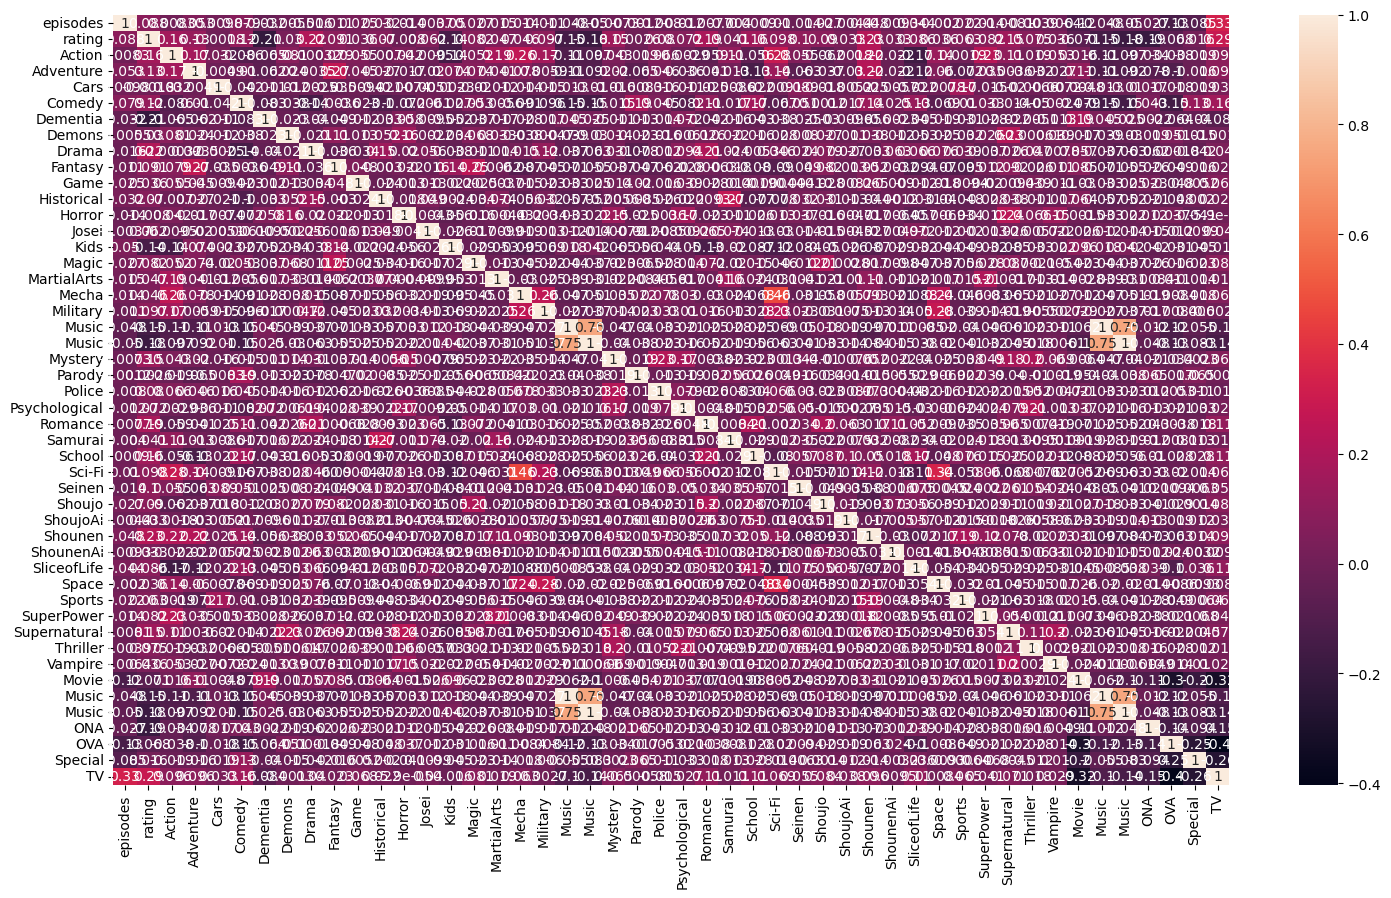

In [53]:
plt.figure(figsize=(18,10))
sns.heatmap(corrs, annot=True)
plt.show()

In [54]:
X = anime_ml_df.loc[:, feature_cols]

In [55]:
# Fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=5)  # Choose the number of neighbors you want
knn_model.fit(X)

# Get recommendations for a specific anime (by index)
index = 5  # Change this to the index of the anime you want recommendations for
distances, indices = knn_model.kneighbors(X.iloc[index].values.reshape(1, -1))
recommended_animes = anime_ml_df.iloc[indices[0]]

# Display recommended animes
print(recommended_animes)

                                                 name  episodes   rating  \
5   Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga... -0.051669  2.62352   
14                            Haikyuu!! Second Season  0.267766  2.40698   
43                                          Haikyuu!!  0.267766  2.16091   
32                     Hajime no Ippo: New Challenger  0.289061  2.22981   
44                             Hajime no Ippo: Rising  0.267766  2.16091   

    Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Fantasy  Game  \
5        0          0     0       1         0       0      1        0     0   
14       0          0     0       1         0       0      1        0     0   
43       0          0     0       1         0       0      1        0     0   
32       0          0     0       1         0       0      1        0     0   
44       0          0     0       1         0       0      1        0     0   

    Historical  Horror  Josei  Kids  Magic  MartialArts  Mecha  Mili

In [57]:
# User inputs
recomendation_length = 10
name = "Vampire" #Circles


anime_info = anime_ml_df.loc[(anime_ml_df.name == name)].sort_values(by="rating", ascending=False)
anime_info

,name,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Movie,Music,ONA,OVA,Special,TV
11474,Vampire,-0.222035,0.074244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [58]:
# Find the index of the entered title
anime_index = anime_ml_df[anime_ml_df['title'].str.lower() == title.lower()].index

if not anime_index.empty:
    index = anime_index[0]
else:
    print("Anime not found.")

KeyError: 'title'

In [59]:
if not anime_index.empty:
    distances, indices = knn_model.kneighbors(X.iloc[index].values.reshape(1, -1))
    recommended_animes = anime_ml_df.iloc[indices[0]]
    
    # Display recommended animes
    print("Recommended Animes:")
    print(recommended_animes[['title', 'episodes', 'rating', 'members']])

NameError: name 'anime_index' is not defined

In [60]:
# User inputs
recomendation_length = 10
name = "Vampire" #Circles


anime_info = anime_ml_df.loc[(anime_ml_df.name == name)].sort_values(by="rating", ascending=False)
anime_info

,name,episodes,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Movie,Music,ONA,OVA,Special,TV
11474,Vampire,-0.222035,0.074244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [61]:
# Step 1: Instantiate the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['numerical_column1', 'numerical_column2']),
        ('cat', OneHotEncoder(), ['categorical_column'])
    ])

# Step 2: Fit the ColumnTransformer
preprocessor.fit(X_train)

# Step 3: Transform the data
X_train_transformed = preprocessor.transform(X_train)

NameError: name 'X_train' is not defined

In [62]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = anime_ml_df.loc[:, feature_cols]

# Preprocess the data
X_preprocessed = preprocessor.transform(X)

# NO TARGET OR TRAIN TEST SPLIT
X.head()

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [63]:
 # define the number of nearest neighbors to consider
k = recomendation_length

# Initialize the nearest neighbors model
model1 = NearestNeighbors(n_neighbors=k, metric="euclidean")

# Fit the model to the preprocessed data
model1.fit(X_preprocessed)

NameError: name 'X_preprocessed' is not defined